# Outlier Detection in Titanic Dataset
This notebook explores different outlier detection techniques on the Titanic dataset.

### 🔹 Methods Covered:
1. **Boxplot (IQR Method)**
2. **Z-Score (Standard Deviation Method)**
3. **Isolation Forest**
4. **Local Outlier Factor (LOF)**
5. **DBSCAN (Density-Based Clustering)**
6. **Elliptic Envelope (Robust Covariance Estimation)**
7. **One-Class SVM (Support Vector Machine)**
8. **Mahalanobis Distance**
9. **Histogram-Based Outlier Detection (HBOS)**

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.covariance import EllipticEnvelope

# Load the dataset(if facing issues - try copying and pasting the path of the file)
df = pd.read_csv("Titanic-Dataset.csv")

# Display basic information
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<>:12: SyntaxWarning: invalid escape sequence '\D'
<>:12: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Ch.K.Abhiram\AppData\Local\Temp\ipykernel_17376\1598220581.py:12: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("E:\Data Science\EDA\Outlier Detection\Titanic-Dataset.csv")


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:

# Handling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# Convert categorical columns to numerical
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Display cleaned data info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


C:\Users\Ch.K.Abhiram\AppData\Local\Temp\ipykernel_17376\1053342627.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Ch.K.Abhiram\AppData\Local\Temp\ipykernel_17376\1053342627.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

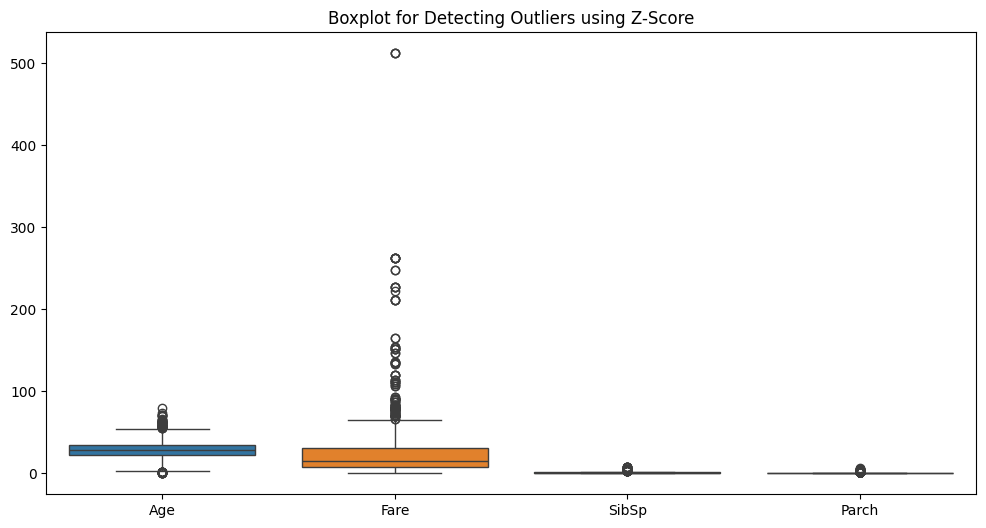

In [4]:

# Z-Score Method
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = np.where(z_scores > 3)

# Visualizing Outliers using Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Fare', 'SibSp', 'Parch']])
plt.title("Boxplot for Detecting Outliers using Z-Score")
plt.show()


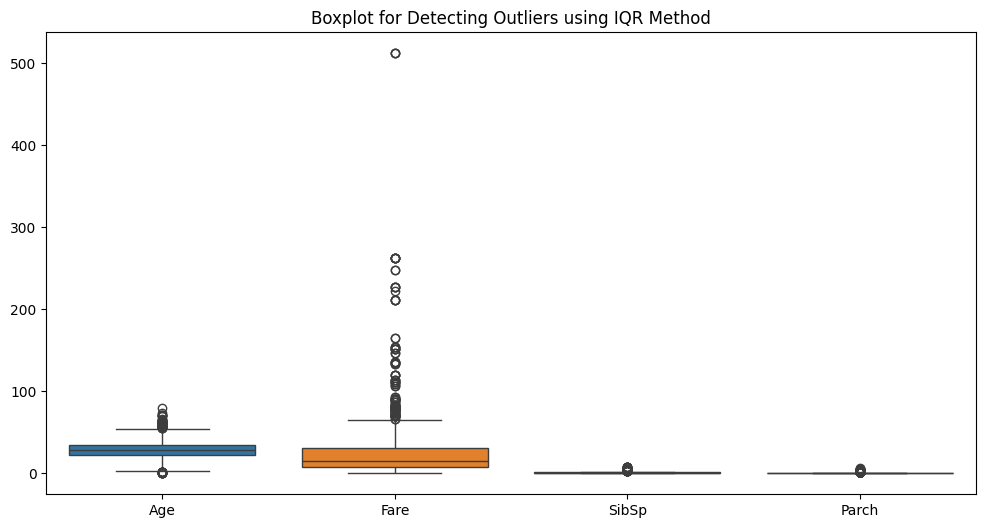

In [5]:

# IQR Method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Outliers detected using IQR
outliers_iqr = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Visualizing Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Fare', 'SibSp', 'Parch']])
plt.title("Boxplot for Detecting Outliers using IQR Method")
plt.show()


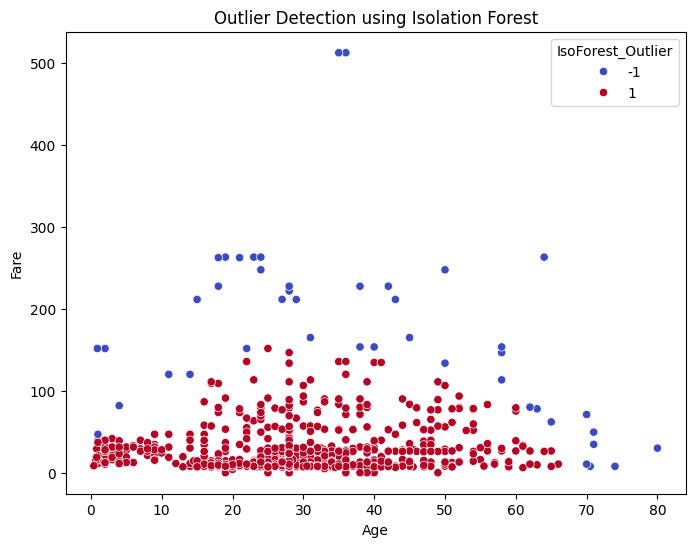

In [6]:

# Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['IsoForest_Outlier'] = iso_forest.fit_predict(df[['Age', 'Fare']])

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Age'], y=df['Fare'], hue=df['IsoForest_Outlier'], palette='coolwarm')
plt.title("Outlier Detection using Isolation Forest")
plt.show()


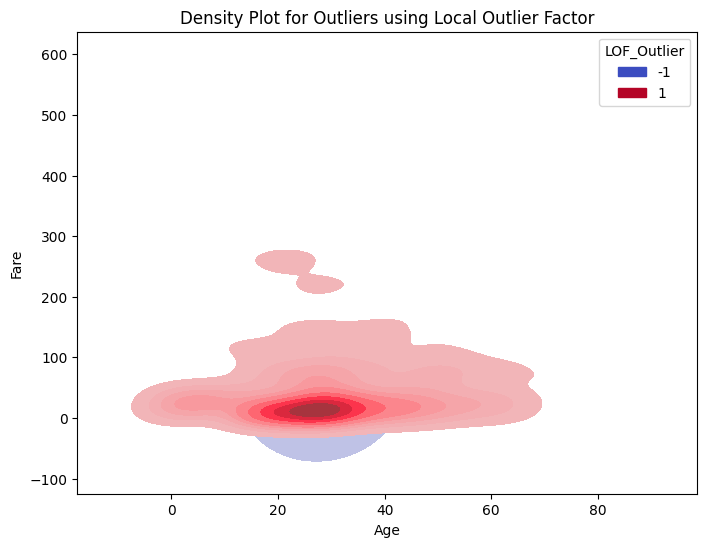

In [7]:

# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20)
df['LOF_Outlier'] = lof.fit_predict(df[['Age', 'Fare']])

# Visualization
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Age', y='Fare', hue='LOF_Outlier', fill=True, palette='coolwarm')
plt.title("Density Plot for Outliers using Local Outlier Factor")
plt.show()


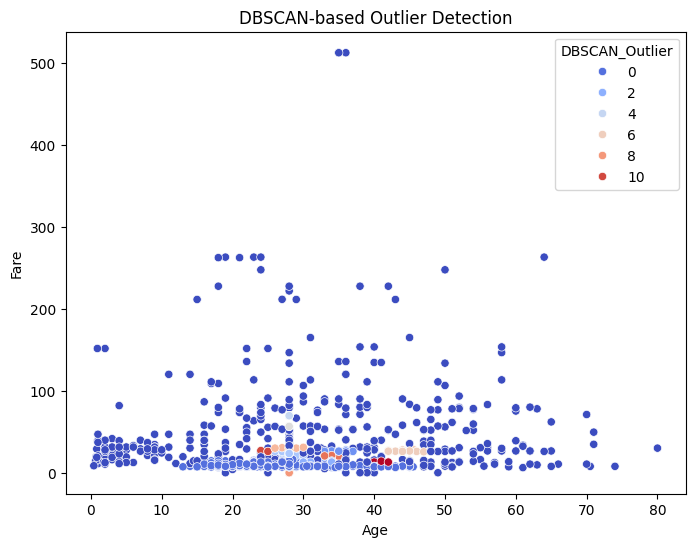

In [8]:

# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['DBSCAN_Outlier'] = dbscan.fit_predict(df[['Age', 'Fare']])

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Age'], y=df['Fare'], hue=df['DBSCAN_Outlier'], palette='coolwarm')
plt.title("DBSCAN-based Outlier Detection")
plt.show()


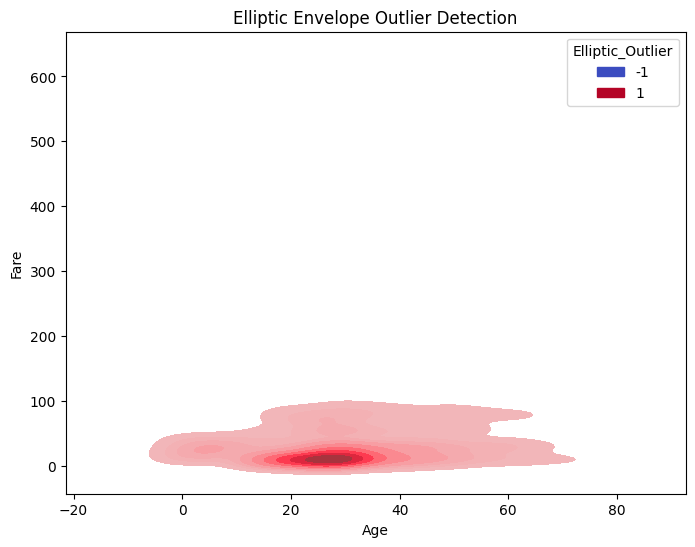

In [9]:

# Elliptic Envelope
ell_env = EllipticEnvelope(contamination=0.05)
df['Elliptic_Outlier'] = ell_env.fit_predict(df[['Age', 'Fare']])

# Visualization
plt.figure(figsize=(8, 6))
sns.kdeplot(x=df['Age'], y=df['Fare'], hue=df['Elliptic_Outlier'], fill=True, palette='coolwarm')
plt.title("Elliptic Envelope Outlier Detection")
plt.show()
